In [4]:
datapath='../../features'
Flods=[0]
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
import os
import gc
print(os.getcwd())

/Users/yujiazhai/iCloud Drive (Archive) - 1/Desktop/CS235Project/scripts


In [5]:
### Yujia's klr (rbf and sigmoid)

def sigmoid(x):
    return 1/(1+np.exp(-x))

###################
def debuger(w,eta,newf):
    print(eta,newf)
    
def klrloss(a,K,Y,lmbda):
    anob = a.copy()
    anob[0] = 0
    return (np.sum(np.log(1+np.exp(-Y*(K@a))),0).T + 0.5*lmbda*(a.T@K@a))[0]

def klrgrad(a,K,Y,lmbda):
    anob = a.copy()
    anob[0] = 0
    return -np.sum((1-1/(1+np.exp(-Y*(K@a))))*K*Y,0)[:,np.newaxis] + lmbda*(K@a)

def trainklr(K,Y,lmbda):
    a0 = np.zeros((K.shape[1],1)) # starting a at zero works well for KLR
    return graddesc(a0,lambda a : klrloss(a,K,Y,lmbda),
                  lambda a : klrgrad(a,K,Y,lmbda))

def klrerrorrate(K,Y,a):
    #return np.sum(Y*K@a<=0)/Y.shape[0]
    return np.sum(Y*(K.T@a)<=0)/Y.shape[0]

# provided code for grad desc. eta is starting value. ittfn is optional function to call on each iteration

def graddesc(w,fn,gradfn,eta = 0.3, ittfn=None):
    oldf = fn(w)
    df = 1
    while(df>1e-6):
        g = gradfn(w)
        eta=0.3
        while eta>1e-10:
            neww = w - eta*g
            newf = fn(neww)
            if oldf>newf*1.001:
                break
            eta *= 0.5
        if ittfn is not None:
            ittfn(w,eta,newf)
        if eta<=1e-10:
            break
        df=newf-oldf
        oldf = newf
        
        w = neww
    return w
'''
def graddesc(w,fn,gradfn,eta = 0.1, ittfn=None):
    oldf = fn(w)
    df = 1
    while(df>1e-6):
        print(df)
        w = w - eta*gradfn(w)
        newf = fn(w)
        df = oldf - newf # hope to be positive, or we've over-shot and will be done
        if ittfn is not None:
            ittfn(w,eta,newf)
        oldf = newf
    return w
'''

def up(x):
    if len(x.shape)==1:
        return x[np.newaxis,:]
    else:
        return x

def rbfkernel(x1,x2,sigma):
    x1 = up(x1)
    x2 = up(x2)
    d = x1[:,np.newaxis,:] - x2[np.newaxis,:,:]
    return np.exp(-np.sum(d*d,2)/(2*sigma*sigma))


def sigmoid_kernel(data1, data2, sigmoid_alpha, sigmoid_constant):
    return np.tanh(sigmoid_alpha*np.dot(data1, data2.T)+sigmoid_constant)
#def rbfkernel(data1, data2, sigmoid_alpha, sigmoid_constant):
#    return np.tanh(sigmoid_alpha*np.dot(data1, data2)+sigmoid_constant)

SyntaxError: invalid syntax (<ipython-input-5-7b77ac8a4522>, line 10)

In [3]:

lmbdas=10**np.arange(-3,5.1,0.5)
#lmbdas=[1]
#sigmas=10**np.arange(0.2,0.8,0.1)
sigmas=[3.16]
overall_err=[]
for flod in Flods:
    overall_err.append([])
    trainfile=open('{0}/cv_{1}_4_{2}_4/cv_train_features_{1}_4_{2}_4.csv'.format(datapath,flod,flod+1))
    testfile=open('{0}/cv_{1}_4_{2}_4/cv_test_features_{1}_4_{2}_4.csv'.format(datapath,flod,flod+1))
    trainX=[]
    trainY=[]
    testX=[]
    testY=[]
    for line in trainfile:
        line=line.split(',')[1:]
        if line[0]=='safe_type':
            continue
        line=[float(k) for k in line]
        trainX.append(line[1:])
        trainY.append(line[0])
    trainX=np.array(trainX)
    trainY=np.array(trainY)[:,np.newaxis]
    trainY[trainY==0]=-1
    print(trainX.shape,trainY.shape)

    for line in testfile:
        line=line.split(',')[1:]
        if line[0]=='safe_type':
            continue
        line=[float(k) for k in line]
        testX.append(line[1:])
        testY.append(line[0])
    testX=np.array(testX)
    testY[testY==0]=-1
    testY=np.array(testY)[:,np.newaxis]
    print(testX.shape,testY.shape)
    
    

    for lmbda in lmbdas:
        for sigma in sigmas:
            sigma_round=round(sigma,2)
            lmbda_round=round(lmbda,4)
            if os.path.exists('{0}/cv_{1}_4_{2}_4/K_train_{1}_4_{2}_4_{3}.npy'.format(datapath,flod,flod+1,sigma_round)) and os.path.exists('{0}/cv_{1}_4_{2}_4/K_test_{1}_4_{2}_4_{3}.npy'.format(datapath,flod,flod+1,sigma_round)):
                K=np.load('{0}/cv_{1}_4_{2}_4/K_train_{1}_4_{2}_4_{3}.npy'.format(datapath,flod,flod+1,sigma_round))
                K_test=np.load('{0}/cv_{1}_4_{2}_4/K_test_{1}_4_{2}_4_{3}.npy'.format(datapath,flod,flod+1,sigma_round))
                print('load from file')
                print(K.shape,K_test.shape)
            else:
                m=trainX.shape[0]
                K=np.zeros((m,m))
                for i in range(0,m):
                    K[i,:]=rbfkernel(trainX[i,:],trainX,sigma)
                print(K.shape)
                np.save('{0}/cv_{1}_4_{2}_4/K_train_{1}_4_{2}_4_{3}'.format(datapath,flod,flod+1,sigma_round),K)

                mt=testX.shape[0]
                K_test=np.zeros((m,mt))
                for j in range(0,mt):
                    K_test[:,j]=rbfkernel(trainX,testX[j,:],sigma)[:,0]
                print(K_test.shape)
                np.save('{0}/cv_{1}_4_{2}_4/K_test_{1}_4_{2}_4_{3}'.format(datapath,flod,flod+1,sigma_round),K_test)

#             for i in range(0,m):
#                 for j in range(0,m):
#                     K[i,j]=rbfkernel(trainX[i,:],trainX[j,:],sigma)
            myw = trainklr(K,trainY,lmbda)
#             for i in range(0,mt):
#                 for j in range(0,m):
#                     K[i,j]=rbfkernel(testX[i,:],trainX[j,:],sigma)
            overall_err[-1].append(klrerrorrate(K_test,testY,myw))
            print(overall_err[-1][-1])
    plt.cla()
    plt.plot(lmbdas, overall_err[-1],'b',linewidth=2)
    plt.xscale('log')


    plt.xlabel('$\lambda$',fontsize=15)
    plt.ylabel('Error rate',fontsize=15)
    plt.title('Error distribution',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.show()
    gc.collect()

((18000, 55), (18000, 1))
((6000, 55), (6000, 1))


NameError: name 'rbfkernel' is not defined

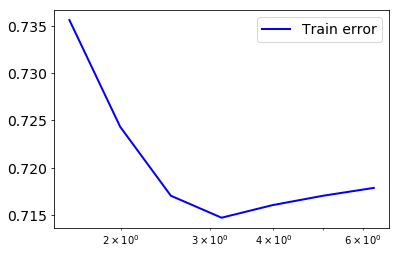

6458

In [14]:
    plt.cla()
    plt.plot(sigmas, overall_err[-1],'b',linewidth=2)
    plt.xscale('log')


#     plt.xlabel('$\sigma$',fontsize=15)
#     plt.ylabel('Error rate',fontsize=15)
#     plt.title('Error distribution',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=14)
    plt.legend(['Train error'],fontsize=14)
    plt.savefig("../result/sigma_sensitive.pdf")
    plt.show()
    gc.collect()

In [9]:

#lmbdas=10**np.arange(1,5.1,0.5)
lmbda=1
sigma=10**(-2.4)

trainfile=open('{0}/full/train_features_full.csv'.format(datapath,flod,flod+1))
testfile=open('{0}/full/test_features_full.csv'.format(datapath,flod,flod+1))
trainX=[]
trainY=[]
testX=[]
testY=[]
for line in trainfile:
    line=line.split(',')[1:]
    if line[0]=='safe_type':
        continue
    line=[float(k) for k in line]
    trainX.append(line[1:])
    trainY.append(line[0])
trainX=np.array(trainX)
trainY=np.array(trainY)[:,np.newaxis]
trainY[trainY==0]=-1
print(trainX.shape,trainY.shape)

for line in testfile:
    line=line.split(',')[1:]
    if line[0]=='safe_type':
        continue
    line=[float(k) for k in line]
    testX.append(line[1:])
    testY.append(line[0])
testX=np.array(testX)
testY[testY==0]=-1
testY=np.array(testY)[:,np.newaxis]
print(testX.shape,testY.shape)
    
    

sigma_round=round(sigma,2)
if os.path.exists('{0}/full/K_train_{1}.npy'.format(datapath,sigma_round)) and os.path.exists('{0}full/K_test_{1}.npy'.format(datapath,sigma_round)):
    K=np.load('{0}/full/K_train_{1}.npy'.format(datapath,sigma_round))
    K_test=np.load('{0}/full/K_test_{1}.npy'.format(datapath,sigma_round))
    print('load from file')
    print(K.shape,K_test.shape)
else:
    m=trainX.shape[0]
    K=np.zeros((m,m))
    for i in range(0,m):
        K[i,:]=rbfkernel(trainX[i,:],trainX,sigma)
    print(K.shape)
    np.save('{0}/full/K_train_{1}.npy'.format(datapath,sigma_round),K)

    mt=testX.shape[0]
    K_test=np.zeros((m,mt))
    for j in range(0,mt):
        K_test[:,j]=rbfkernel(trainX,testX[j,:],sigma)[:,0]
    print(K_test.shape)
    np.save('{0}/full/K_test_{1}.npy'.format(datapath,sigma_round),K_test)


myw = trainklr(K,trainY,lmbda)

ans=-(testY*(K_test.T@myw))
np.sum(ans<=0)/testY.shape[0]
outfile=open('{0}/full/result.csv'.format(datapath),'w')
for i in range(0,testY.shape[0]):
    outfile.write('{0},{1}\n'.format(testY[i],int(ans[i]/abs(ans[i]))))
print(err)

(24000, 55) (24000, 1)
(6000, 55) (6000, 1)
(24000, 24000)
(24000, 6000)


NameError: name 'Y' is not defined

In [14]:
ans=-(testY*(K_test.T@myw))
np.sum(ans<=0)/testY.shape[0]
outfile=open('{0}/full/result.csv'.format(datapath),'w')
for i in range(0,testY.shape[0]):
    outfile.write('{0},{1}\n'.format(testY[i],int(ans[i])))
outfile.close()